In [1]:
import json
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmasher as cmr
import seaborn as sns
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter



from PIL import Image
from mplsoccer import Pitch, VerticalPitch, add_image

from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

from highlight_text import fig_text
from bs4 import BeautifulSoup

from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib.patches import Arc

In [2]:
cHome = '#6CABDD'
cAway = 'red'
pHome = 'mancity.png'
pAway = 'liverpool.png'
comp = 'Carabao Cup'
stage = 'Rd of 16'
venue = ' Etihad Stadium'
date = '22/12/2022'

In [3]:
with open('liverpoolcup.json',encoding = "utf8") as f:
    data = json.load(f)

df = pd.json_normalize(data['events'], sep = '_')

In [4]:
team_dict  = {
    data['home']['teamId']: data['home']['name'],
    data['away']['teamId']: data['away']['name']
}

player = data['home']['players'] + data['away']['players']
player_dict = {}

for i in player:
    player_dict[i['playerId']] = i['name']
    
df_player = df[df.isTouch == True]
foul_ids = df_player[df_player.playerId.isnull()].index.tolist()
df_player = df_player.drop(foul_ids)
df_player['team_name'] = df_player.teamId.apply(lambda x: team_dict[x])
df_player['player_name'] = df_player.playerId.apply(lambda x: player_dict[x])

# Touches

In [5]:
touches_df = df[df.isTouch == True]
foul_ids = touches_df[touches_df.playerId.isnull()].index.tolist()
touches_df = touches_df.drop(foul_ids)
touches_df['team_name'] = touches_df.teamId.apply(lambda x: team_dict[x])
touches_df['player_name'] = touches_df.playerId.apply(lambda x: player_dict[x])

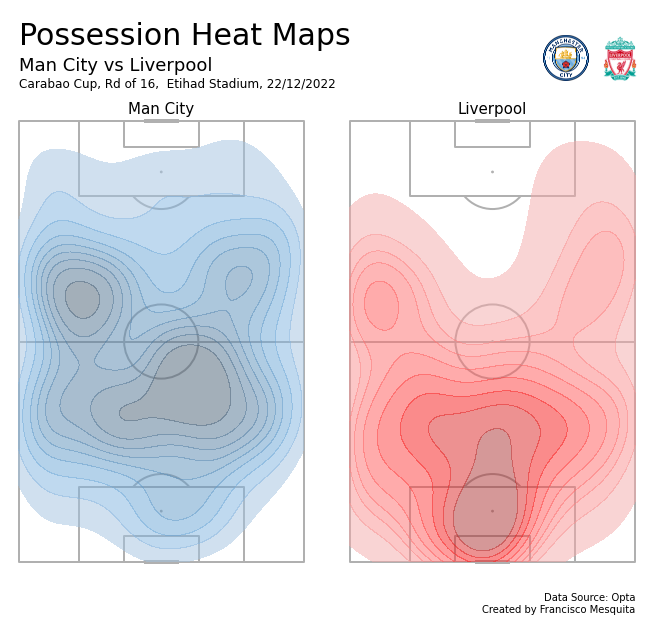

In [48]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = touches_df[touches_df.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

away = touches_df[touches_df.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.7, 'Possession Heat Maps', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

(-0.5, 3499.5, 3499.5, -0.5)

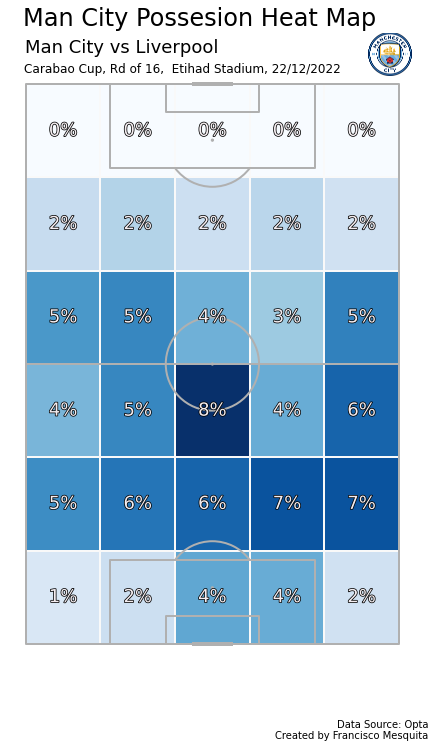

In [83]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (6, 10))
fig.set_facecolor("white")

home = touches_df[touches_df.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.47, y = .98, s = 'Man City Possesion Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.29, y = .94, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.43, y = .91, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(1, 0, 'Data Source: Opta', va = 'center', ha = 'right')
legend2 = fig.text(1, -0.015, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.86, 0.9, 0.1, 0.06], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

# Passing/Possession

In [7]:
pass_data = df[df.type_displayName == 'Pass'].reset_index()
pass_data['team_name'] = pass_data.teamId.apply(lambda x: team_dict[x])
pass_data['player_name'] = pass_data.playerId.apply(lambda x: player_dict[x])

def is_atk_third(data):
    if data.endX > 66.6 and data.x <= 66.6:
        return True
    else:
        return False

def at_atk_third(data):
    if data.x > 66.6 and data.endX > 66.6:
        return True
    else:
        return False

pass_data['to_atk_third'] = pass_data.apply(lambda x: is_atk_third(x), axis=1)
pass_data['at_atk_third'] = pass_data.apply(lambda x: at_atk_third(x), axis=1)

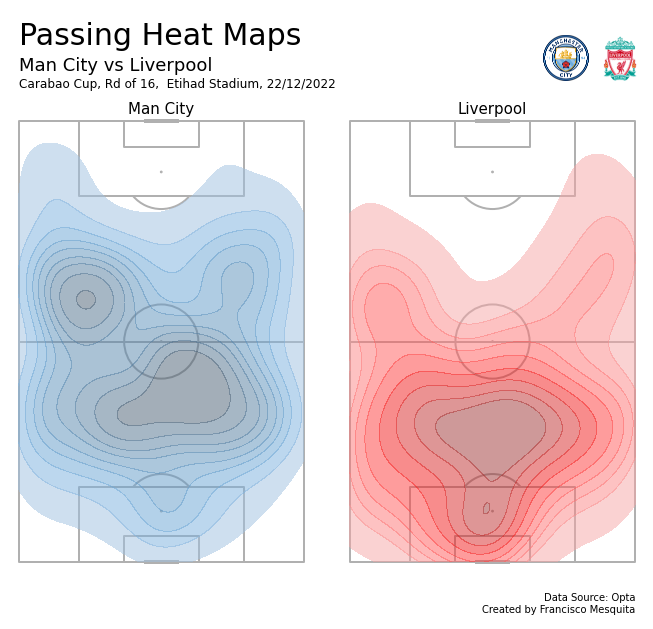

In [53]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

away = pass_data[pass_data.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.7, 'Passing Heat Maps', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

(-0.5, 3499.5, 3499.5, -0.5)

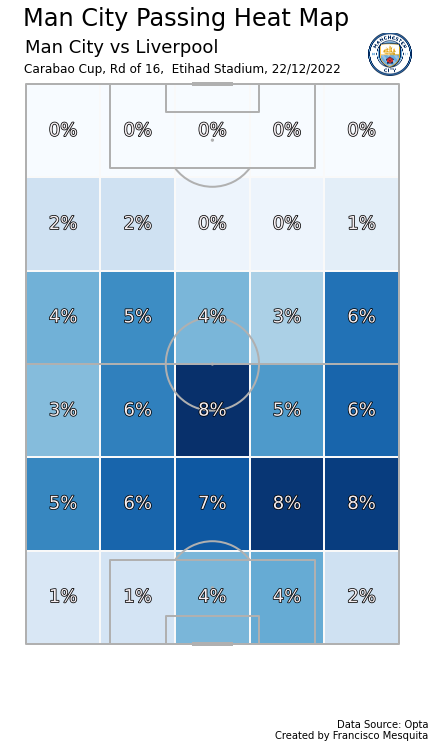

In [79]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (6, 10))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.44, y = .98, s = 'Man City Passing Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.29, y = .94, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.43, y = .91, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(1, 0, 'Data Source: Opta', va = 'center', ha = 'right')
legend2 = fig.text(1, -0.015, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.86, 0.9, 0.1, 0.06], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

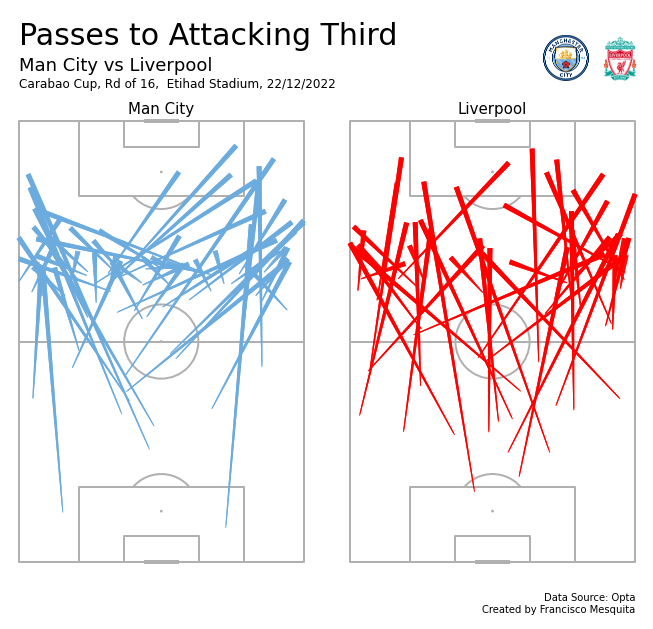

In [10]:
pitch = VerticalPitch(pitch_type = 'opta', half = False)
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]
pitch.lines(home.x, home.y, home.endX, home.endY, comet = True, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], fontsize = 15, va = 'center', ha = 'center')

away = pass_atk[pass_atk.team_name == data['away']['name']]
pitch.lines(away.x, away.y, away.endX, away.endY, comet = True, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], fontsize = 15, va = 'center', ha = 'center')

ax['title'].text(0, 0.7, 'Passes to Attacking Third', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

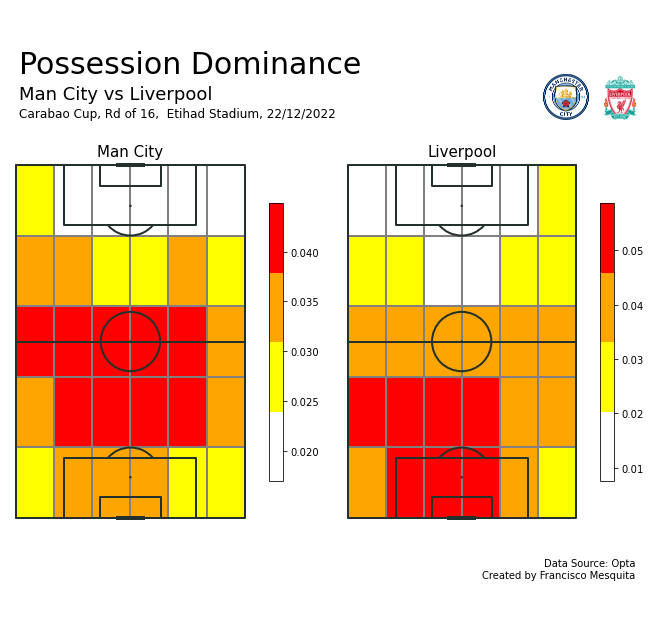

In [11]:
cmap = ListedColormap(['white', 'yellow', 'orange', 'red'])

pitch = VerticalPitch(pitch_type = 'opta', line_color = '#22312b')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

# Home Team
home = pass_data[pass_data.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins = (5, 6), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax =ax['pitch'][0], cmap = cmap, edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

# Away Team
away = pass_data[pass_data.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (5, 6), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = cmap, edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.4, 'Possession Dominance', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 1.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

# Average Position

In [12]:
avg_pos = pass_data[['team_name', 'player_name', 'minute', 'x', 'y', 'endX', 'endY']].groupby(
    ['team_name', 'player_name']).agg({'minute': [np.max, np.min], 'x': np.mean, 'y': np.mean}).reset_index().reset_index()
avg_pos.columns = [' '.join(col).strip() for col in avg_pos.columns.values]
avg_pos['mins_played'] = avg_pos['minute amax'] - avg_pos['minute amin']

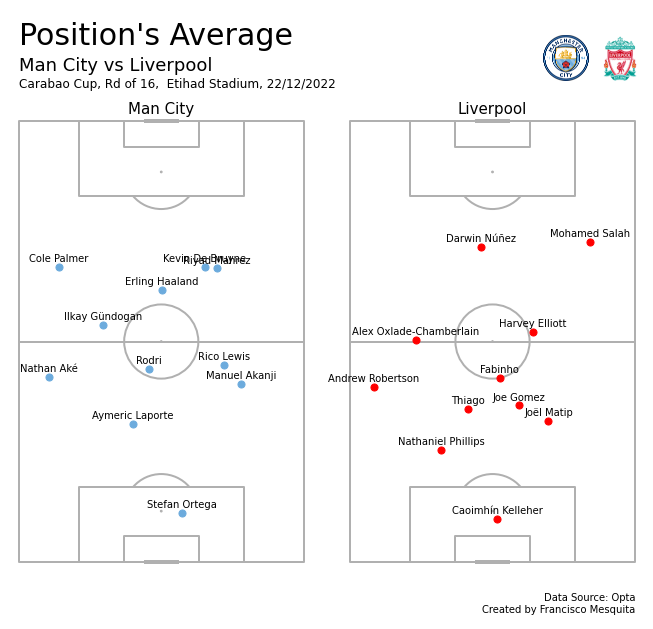

In [13]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = avg_pos[avg_pos.team_name == data['home']['name']]
home = home.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(home['x mean'], home['y mean'], s = 50, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

for i, d in home.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), va = 'center', ha = 'center', ax = ax['pitch'][0])

away = avg_pos[avg_pos.team_name == data['away']['name']]
away = away.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(away['x mean'], away['y mean'], s = 50, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

for i, d in away.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), va = 'center', ha = 'center', ax = ax['pitch'][1])

ax['title'].text(0, 0.7, 'Position\'s Average', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

# Passing Network

In [14]:
team = pass_data.team_name.values.tolist()
passer = pass_data.player_name.values.tolist()
receiver = pass_data.player_name.shift(-1).tolist()
team_receiver = pass_data.team_name.shift(-1).tolist()
pass_outcome = pass_data.outcomeType_displayName.values.tolist()
x = pass_data.x.values.tolist()
y = pass_data.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team': team,
    'team_receiver': team_receiver,
    'passer': passer,
    'receiver': receiver,
    'pass_outcome': pass_outcome,
    'x': x,
    'y': y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['id'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_pair_df = pass_net_df[['passer', 'receiver', 'pass_outcome']].groupby(['passer', 'receiver']).count().reset_index()
pass_pair_df['id'] = pass_pair_df['passer'] + pass_pair_df['receiver']
pass_pair_df = pass_pair_df.sort_values('pass_outcome', ascending = False)

# Retrieve Top 11 Players
top_11_home = avg_pos[avg_pos.team_name == data['home']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]
top_11_away = avg_pos[avg_pos.team_name == data['away']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]

# Filter the data
avg_pos_11 = avg_pos[avg_pos.player_name.isin(top_11_home + top_11_away)].reset_index(drop = True)
avg_pos_11 = avg_pos_11.drop(['index', 'minute amax', 'minute amin', 'mins_played'], axis = 1)

pass_merge = pass_pair_df.merge(avg_pos_11, left_on = 'passer', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x', 'y mean': 'y'}, axis = 'columns')
pass_merge = pass_merge.merge(avg_pos_11, left_on = 'receiver', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x_end', 'y mean': 'y_end'}, axis = 'columns')
pass_merge = pass_merge.drop(['player_name_x', 'team_name_y', 'id', 'player_name_y'], axis = 1)
pass_merge = pass_merge.rename({'team_name_x': 'team_name'}, axis = 'columns')

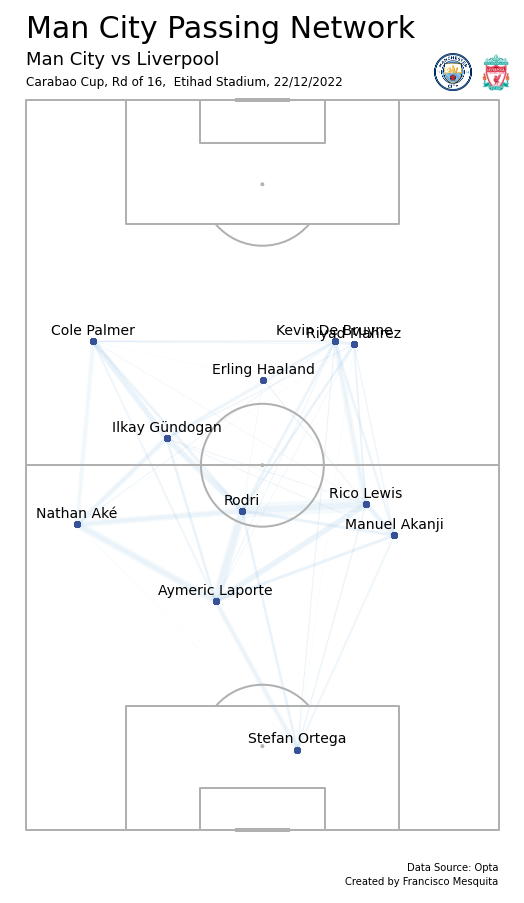

In [49]:
pitch = VerticalPitch(pitch_type = 'opta')

fig, ax = pitch.grid(figheight = 13, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)

fig.set_facecolor("white")

home = pass_merge[pass_merge.team_name == data['home']['name']]

pitch.lines(home.x, home.y, home.x_end, home.y_end, color = cHome, 
            linewidth = home.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'])
pitch.scatter(home.x, home.y, color = '#375197', ax = ax['pitch'])

for i, d in home[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x + 1.5, d.y), ax = ax['pitch'], va = 'center', ha = 'center', size = 14)

ax['title'].text(0, 0.7, 'Man City Passing Network', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha ='left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

# Progressive Passes

In [16]:
pass_data['begin'] = pass_data.apply(lambda x: np.sqrt((100 - x['x']) ** 2 + (50 - x['y'])), axis = 1)
pass_data['end'] = pass_data.apply(lambda x: np.sqrt((100 - x['endX']) ** 2 + (50 - x['endY'])), axis = 1)
pass_data['progressive'] = pass_data.apply(lambda x: True if x.end / x.begin < .75 else False, axis = 1)

pass_prog = pass_data[pass_data.progressive == True]
home = pass_prog[pass_prog.team_name == data['home']['name']]

home_succ = home[home.outcomeType_displayName == 'Successful']

away = pass_prog[pass_prog.team_name == data['away']['name']]

away_succ = away[away.outcomeType_displayName == 'Successful']

Man City had 66 Successfull Progressive Passes
Liverpool had 35 Successfull Progressive Passes


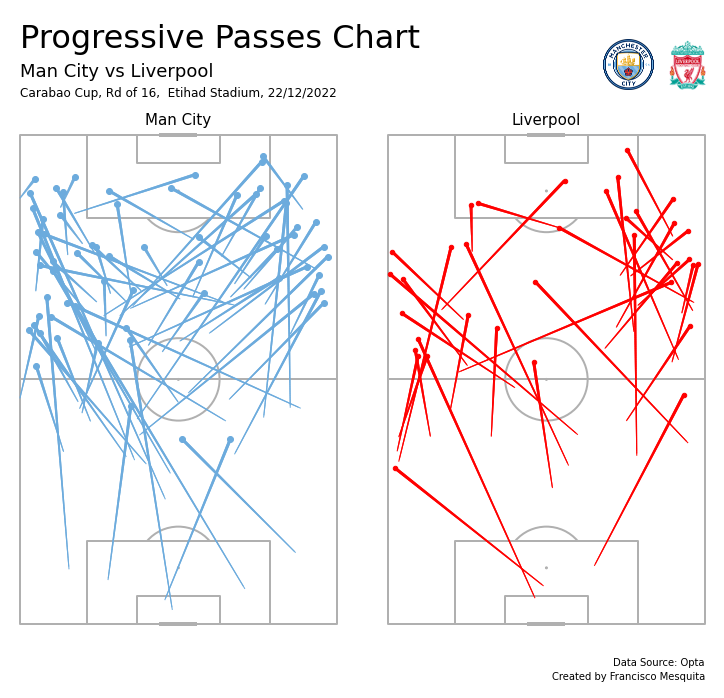

In [84]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 0)
fig, ax = pitch.grid(ncols = 2, axis = False, figheight = 10)
fig.set_facecolor("white")

home = pass_prog[pass_prog.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_succ_Total = home_succ[home_succ.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(home_succ.x, home_succ.y, home_succ.endX, home_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][0], color = cHome)
pitch.scatter(home_succ.endX, home_succ.endY, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_succ = away[away.outcomeType_displayName == 'Successful']
away_succ_Total = away_succ[away_succ.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(away_succ.x, away_succ.y, away_succ.endX, away_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][1], color = cAway)
pitch.scatter(away_succ.endX, away_succ.endY, s = 20, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.7, 'Progressive Passes Chart', va = 'center', ha = 'left', fontsize = 32)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

# Defensive Actions

In [1]:
df_def = df[df.type_displayName.isin(['Clearance', 'Interception', 'BlockedPass', 'Tackle', 'BallRecovery'])]
df_def['team_name'] = df_def.teamId.apply(lambda x: team_dict[x])
df_def['player_name'] = df_def.playerId.apply(lambda x: player_dict[x])

NameError: name 'df' is not defined

In [19]:
Clearance = df[df.type_displayName == 'Clearance'].reset_index()
Clearance['team_name'] = Clearance.teamId.apply(lambda x: team_dict[x])
Clearance['player_name'] = Clearance.playerId.apply(lambda x: player_dict[x])
Clearance = Clearance[Clearance.team_name == 'Man City']
Clear_Total = Clearance[Clearance.columns[0]].count()
print(str(Clear_Total) + ' Clearances')

Interception = df[df.type_displayName == 'Interception'].reset_index()
Interception['team_name'] = Interception.teamId.apply(lambda x: team_dict[x])
Interception['player_name'] = Interception.playerId.apply(lambda x: player_dict[x])
Interception = Interception[Interception.team_name == 'Man City']
Intercep_Total = Interception[Interception.columns[0]].count()
print(str(Intercep_Total) + ' Interceptions')

BlockedPass = df[df.type_displayName == 'BlockedPass'].reset_index()
BlockedPass['team_name'] = BlockedPass.teamId.apply(lambda x: team_dict[x])
BlockedPass['player_name'] = BlockedPass.playerId.apply(lambda x: player_dict[x])
BlockedPass = BlockedPass[BlockedPass.team_name == 'Man City']
BlockPass_Total = BlockedPass[BlockedPass.columns[0]].count()
print(str(BlockPass_Total) + ' Blocked Passes')

Tackle = df[df.type_displayName == 'Tackle'].reset_index()
Tackle['team_name'] = Tackle.teamId.apply(lambda x: team_dict[x])
Tackle['player_name'] = Tackle.playerId.apply(lambda x: player_dict[x])
Tackle = Tackle[Tackle.team_name == 'Man City']
Tackle_Total = Tackle[Tackle.columns[0]].count()
print(str(Tackle_Total) + ' Tackles')

BallRecovery = df[df.type_displayName == 'BallRecovery'].reset_index()
BallRecovery['team_name'] = BallRecovery.teamId.apply(lambda x: team_dict[x])
BallRecovery['player_name'] = BallRecovery.playerId.apply(lambda x: player_dict[x])
BallRecovery = BallRecovery[BallRecovery.team_name == 'Man City']
BallRecover_Total = BallRecovery[BallRecovery.columns[0]].count()
print(str(BallRecover_Total) + ' Ball Recoveries')

9 Clearances
12 Interceptions
7 Blocked Passes
14 Tackles
61 Ball Recoveries


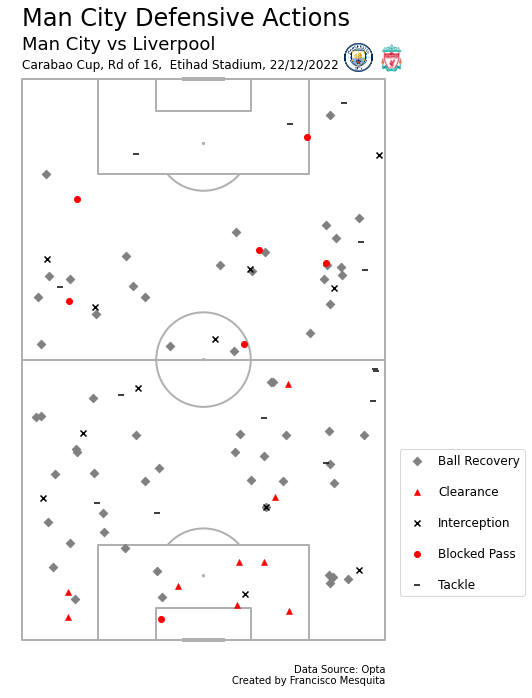

In [20]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(BallRecovery.x, BallRecovery.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(Clearance.x, Clearance.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(Interception.x, Interception.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interception')

pitch.scatter(BlockedPass.x, BlockedPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(Tackle.x, Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Tackle')

axs['title'].text(0, 0.8, 'Man City Defensive Actions', va = 'center', ha = 'left', fontsize = 24)
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.84, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.92, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

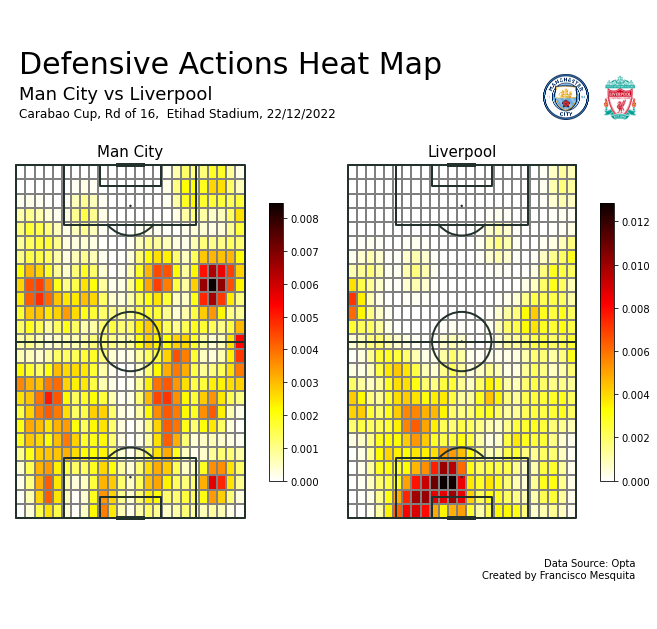

In [21]:
pitch = VerticalPitch(pitch_type= 'opta', line_color = '#22312b')
fig, ax = pitch.grid(ncols = 2, axis = False,)
fig.set_facecolor("white")

# Home Team
home = df_def[df_def.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic= 'count', bins = (25, 25), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

# Away Team
away = df_def[df_def.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.4, 'Defensive Actions Heat Map', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 1.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

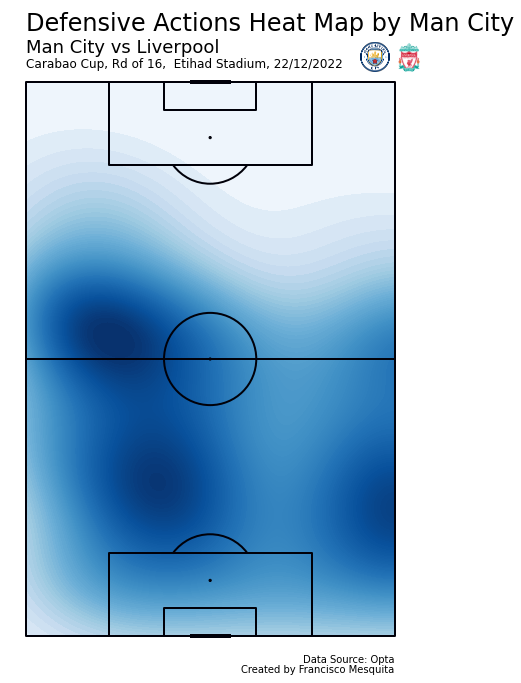

In [30]:
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, title_space = 0,
                      axis = False, grid_height = 0.82, endnote_height = 0.03)
fig.set_facecolor('white')

pitch = VerticalPitch(line_color = '#000009', line_zorder = 1)

# Home Team
home = df_def[df_def.team_name == data['home']['name']]

kde_HD = pitch.kdeplot(home.x, home.y, ax = axs['pitch'],
                          shade = True, levels = 100, shade_lowest = True,
                          cut = 4, cmap = 'Blues')

axs['title'].text(0, 0.7, 'Defensive Actions Heat Map by ' + data['home']['name'], va = 'center', ha = 'left', fontsize = 24)
axs['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)


axs['endnote'].text(1, 0.8, 'Data Source: Opta', va = 'center', ha = 'right')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

add_image(Image.open(pHome), fig, 
          left = 0.85, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.93, bottom = 0.86, width = 0.07, height = 0.07)

plt.show()

# Offensive Actions - Shot Map

In [23]:
Opp = 'Liverpool'

MissedShots = df[df.type_displayName == 'MissedShots'].reset_index()
MissedShots['team_name'] = MissedShots.teamId.apply(lambda x: team_dict[x])
MissedShots['player_name'] = MissedShots.playerId.apply(lambda x: player_dict[x])
MissedShots = MissedShots[MissedShots.team_name == 'Man City']
MissedShots_Total = MissedShots[MissedShots.columns[0]].count()
print(str(MissedShots_Total) + ' Missed Shots (Off Target)')

ShotOnPost = df[df.type_displayName == 'ShotOnPost'].reset_index()
ShotOnPost['team_name'] = ShotOnPost.teamId.apply(lambda x: team_dict[x])
ShotOnPost['player_name'] = ShotOnPost.playerId.apply(lambda x: player_dict[x])
ShotOnPost = ShotOnPost[ShotOnPost.team_name == 'Man City']
ShotOnPost_Total = ShotOnPost[ShotOnPost.columns[0]].count()
print(str(ShotOnPost_Total) + ' Shots on Post')

SavedShot = df[df.type_displayName == 'SavedShot'].reset_index()
SavedShot['team_name'] = SavedShot.teamId.apply(lambda x: team_dict[x])
SavedShot['player_name'] = SavedShot.playerId.apply(lambda x: player_dict[x])
SavedShot = SavedShot[SavedShot.team_name == 'Man City']
SavedShot_Total = SavedShot[SavedShot.columns[0]].count()
print(str(SavedShot_Total) + ' Saved Shots')

Missed = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot'])]
Missed['team_name'] = Missed.teamId.apply(lambda x: team_dict[x])
Missed['player_name'] = Missed.playerId.apply(lambda x: player_dict[x])
Missed = Missed[Missed.team_name == 'Man City']
Missed_Total = Missed[Missed.columns[0]].count()
print(str(Missed_Total) + ' Total Missed Shots')

Goal = df[df.type_displayName == 'Goal'].reset_index()
Goal['team_name'] = Goal.teamId.apply(lambda x: team_dict[x])
Goal['player_name'] = Goal.playerId.apply(lambda x: player_dict[x])
#OwnGoal = Goal[Goal.team_name == Opp]
#OwnGoal_Total = OwnGoal[OwnGoal.columns[0]].count()
Goal = Goal[Goal.team_name == 'Man City']
Goal_Total = Goal[Goal.columns[0]].count()
print(str(Goal_Total) + ' Goals')
#print(str(OwnGoal_Total) + ' Own Goal')

6 Missed Shots (Off Target)
0 Shots on Post
9 Saved Shots
15 Total Missed Shots
3 Goals


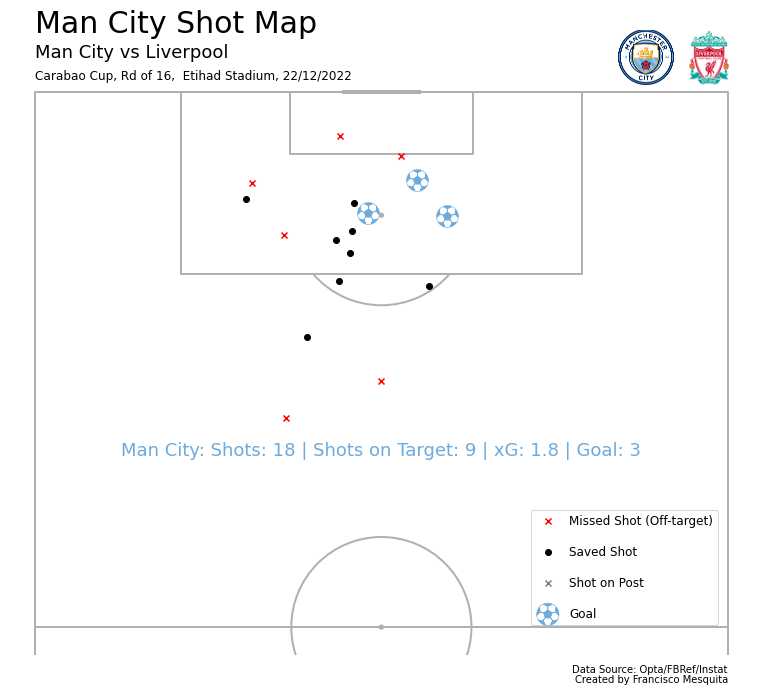

In [50]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors = 'red', linewidth = 0.6, c = 'white', 
#            marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Own Goal')

pitch.scatter(MissedShots.x, MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Missed Shot (Off-target)')

pitch.scatter(SavedShot.x, SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')

pitch.scatter(ShotOnPost.x, ShotOnPost.y, c = 'grey', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')

pitch.scatter(Goal.x, Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

axs['title'].text(0, 0.7, 'Man City Shot Map', va = 'center', ha = 'left', fontsize = 30)
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

# add a legend and title
legend = axs['pitch'].legend(loc = (0.7,.05), labelspacing = 1.5, fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta/FBRef/Instat', va = 'center', ha = 'right')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')


axs['title'].text(0.5, -6.7, "Man City: Shots: 18 | Shots on Target: 9 | xG: 1.8 | Goal: 3", 
                 color = cHome, va = 'center', ha = 'center', fontsize = 18)

plt.show()

# Individual Performances

## Player 1 Kevin De Bruyne

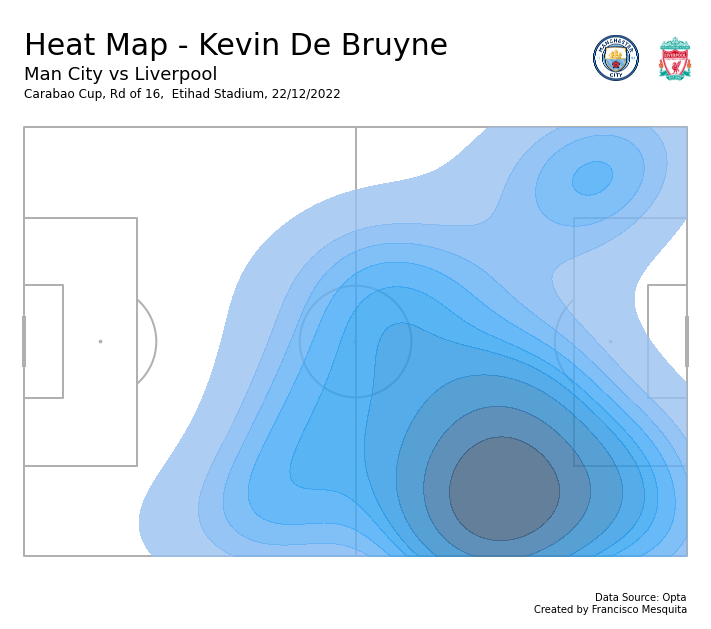

In [25]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player1 = touches_df[touches_df.player_name == 'Kevin De Bruyne']

pitch.kdeplot(player1.x, player1.y, shade = True, alpha = 0.8, ax = ax['pitch']) #, color = cHome)

ax['title'].text(0, 0.6, 'Heat Map - Kevin De Bruyne', va = 'center', ha = 'left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

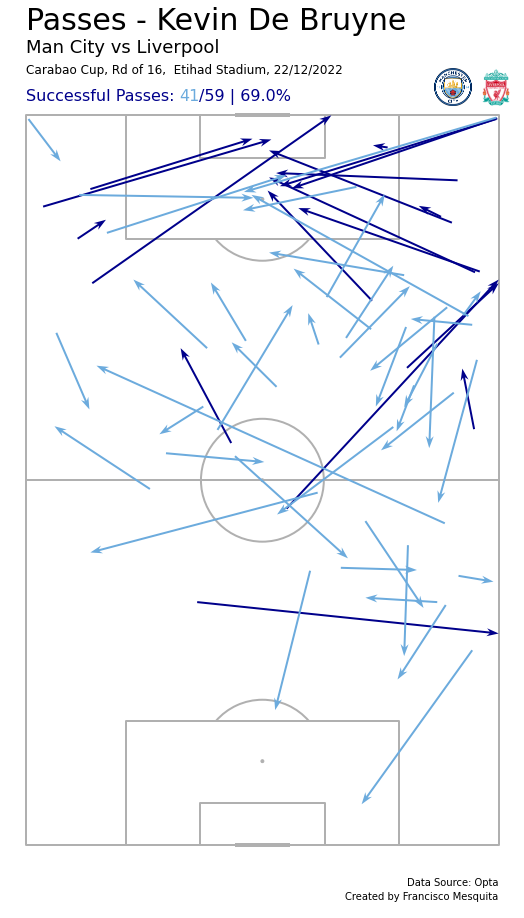

In [34]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 13, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_fail = home[home.outcomeType_displayName == 'Unsuccessful']

player1_succ = home_succ[home_succ.player_name == 'Kevin De Bruyne']
player1_fail = home_fail[home_fail.player_name == 'Kevin De Bruyne']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_succ_total + player1_fail_total #number of total passes
player1_total_perc = round(100 * player1_succ_total/player1_total, 0)

pitch.arrows(player1_fail.x, player1_fail.y, player1_fail.endX, player1_fail.endY,  ax = ax['pitch'], color = '#00008b', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player1_succ.x, player1_succ.y, player1_succ.endX, player1_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1., 'Passes - Kevin De Bruyne', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.65, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.35, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)
ax['title'].text(0, 0.0, 'Successful Passes: ', va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
ax['title'].text(0.325, 0.0, str(player1_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.365, 0.0, '/' + str(player1_total) + ' | ' + str(player1_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#00008b')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.87, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.87, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

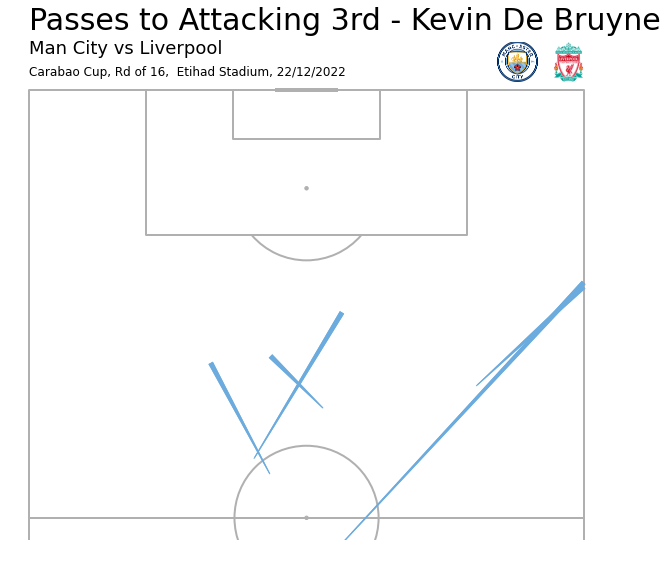

In [32]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]

player1 = home[home.player_name == 'Kevin De Bruyne']

pitch.lines(player1.x, player1.y, player1.endX, player1.endY, comet = True, ax = ax['pitch'], color = cHome)

ax['title'].text(0, 1., 'Passes to Attacking 3rd - Kevin De Bruyne', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)


add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.07)


plt.show()

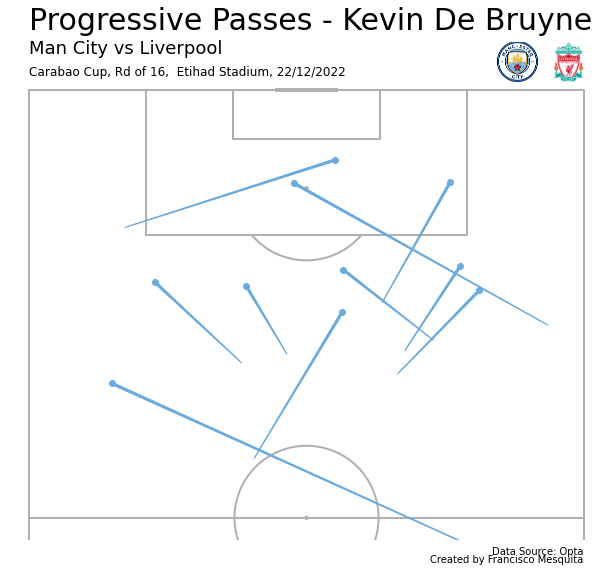

In [33]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

home = pass_prog[pass_prog.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']

player1 = home_succ[home_succ.player_name == 'Kevin De Bruyne']

pitch.lines(player1.x, player1.y, player1.endX, player1.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'], color = cHome)
pitch.scatter(player1.endX, player1.endY, ax = ax['pitch'], color = cHome)

ax['title'].text(0, 1., 'Progressive Passes - Kevin De Bruyne', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

## Player 2 Rodri

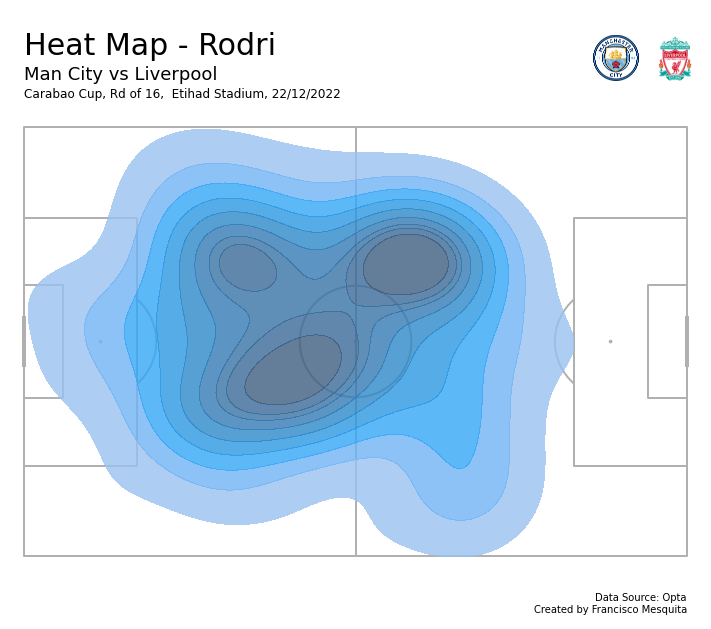

In [35]:
pitch = Pitch(pitch_type ='opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player2 = touches_df[touches_df.player_name == 'Rodri']

pitch.kdeplot(player2.x, player2.y, shade = True, alpha = 0.8, ax = ax['pitch']) #, color = cHome)

ax['title'].text(0, 0.6, 'Heat Map - Rodri', va = 'center', ha = 'left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

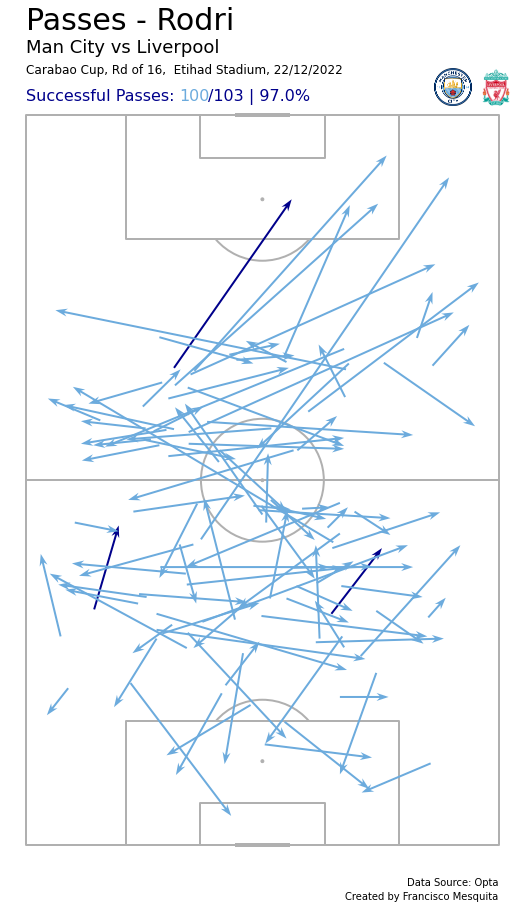

In [40]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 13, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_fail = home[home.outcomeType_displayName == 'Unsuccessful']

player2_succ = home_succ[home_succ.player_name == 'Rodri']
player2_fail = home_fail[home_fail.player_name == 'Rodri']

player2_succ_total = player2_succ[player2_succ.columns[0]].count() #number of successful passes
player2_fail_total = player2_fail[player2_fail.columns[0]].count() #number of unsuccessful passes
player2_total = player2_succ_total + player2_fail_total #number of total passes
player2_total_perc = round(100 * player2_succ_total/player2_total, 0)

pitch.arrows(player2_fail.x, player2_fail.y, player2_fail.endX, player2_fail.endY,  ax = ax['pitch'], color = '#00008b', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player2_succ.x, player2_succ.y, player2_succ.endX, player2_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1., 'Passes - Rodri', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.65, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.35, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)
ax['title'].text(0, 0.0, 'Successful Passes: ', va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
ax['title'].text(0.325, 0.0, str(player2_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.385, 0.0, '/' + str(player2_total) + ' | ' + str(player2_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#00008b')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.87, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.87, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

In [42]:
player2_Clear = Clearance[Clearance.player_name == 'Rodri']
player2_Clear_Total = player2_Clear[player2_Clear.columns[0]].count()
print(str(player2_Clear_Total) + ' Clearances')

player2_Intercep = Interception[Interception.player_name == 'Rodri']
player2_Intercep_Total = player2_Intercep[player2_Intercep.columns[0]].count()
print(str(player2_Intercep_Total) + ' Interceptions')

player2_BlockPass = BlockedPass[BlockedPass.player_name == 'Rodri']
player2_BlockPass_Total = player2_BlockPass[player2_BlockPass.columns[0]].count()
print(str(player2_BlockPass_Total) + ' Blocked Passes')

player2_Tackle = Tackle[Tackle.player_name == 'Rodri']
player2_Tackle_Total = player2_Tackle[player2_Tackle.columns[0]].count()
print(str(player2_Tackle_Total) + ' Tackles')

player2_BallRecover = BallRecovery[BallRecovery.player_name == 'Rodri']
player2_BallRecover_Total = player2_BallRecover[player2_BallRecover.columns[0]].count()
print(str(player2_BallRecover_Total) + ' Ball Recoveries')

2 Clearances
1 Interceptions
2 Blocked Passes
4 Tackles
9 Ball Recoveries


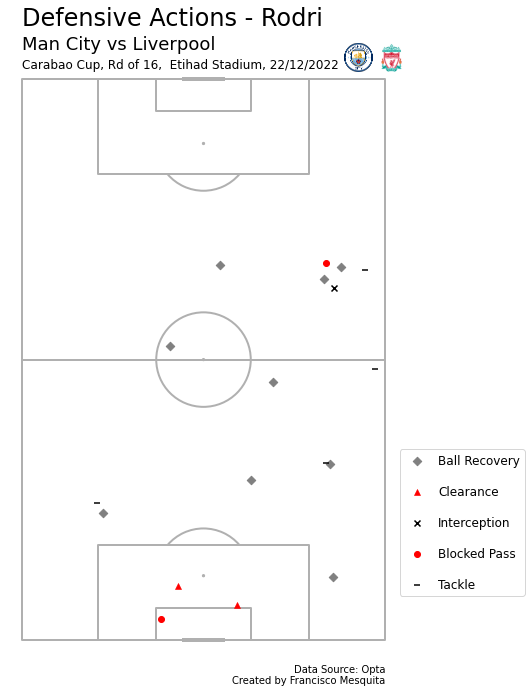

In [43]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(player2_BallRecover.x, player2_BallRecover.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(player2_Clear.x, player2_Clear.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(player2_Intercep.x, player2_Intercep.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interception')

pitch.scatter(player2_BlockPass.x, player2_BlockPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(player2_Tackle.x, player2_Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Tackle')

axs['title'].text(0, 0.8, 'Defensive Actions - Rodri', va = 'center', ha = 'left', fontsize = 24)
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.84, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.92, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

## Player 3 Erling Haarland

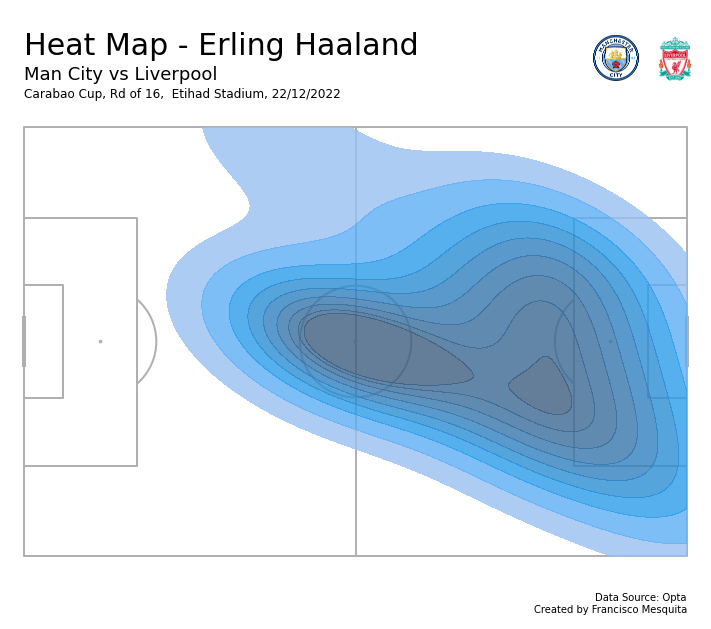

In [44]:
pitch = Pitch(pitch_type ='opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player3 = touches_df[touches_df.player_name == 'Erling Haaland']

pitch.kdeplot(player3.x, player3.y, shade = True, alpha = 0.8, ax = ax['pitch']) #, color = cHome)

ax['title'].text(0, 0.6, 'Heat Map - Erling Haaland', va = 'center', ha = 'left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

In [45]:
player3_MissedShots = MissedShots[MissedShots.player_name == 'Erling Haaland']
player3_MissedShots_Total = player3_MissedShots[player3_MissedShots.columns[0]].count()
print(str(player3_MissedShots_Total) + ' Missed Shots (Off Target)')

player3_ShotOnPost = ShotOnPost[ShotOnPost.player_name == 'Erling Haaland']
player3_ShotOnPost_Total = player3_ShotOnPost[player3_ShotOnPost.columns[0]].count()
print(str(player3_ShotOnPost_Total) + ' Shots on Post')

player3_SavedShot = SavedShot[SavedShot.player_name == 'Erling Haaland']
player3_SavedShot_Total = player3_SavedShot[player3_SavedShot.columns[0]].count()
print(str(player3_SavedShot_Total) + ' Saved Shots')

player3_Missed = Missed[Missed.player_name == 'Erling Haaland']
player3_Missed_Total = player3_Missed[player3_Missed.columns[0]].count()
print(str(player3_Missed_Total) + ' Total Missed Shots')

player3_Goal = Goal[Goal.player_name == 'Erling Haaland']
player3_Goal_Total = player3_Goal[player3_Goal.columns[0]].count()
print(str(player3_Goal_Total) + ' Goals')

1 Missed Shots (Off Target)
0 Shots on Post
0 Saved Shots
1 Total Missed Shots
1 Goals


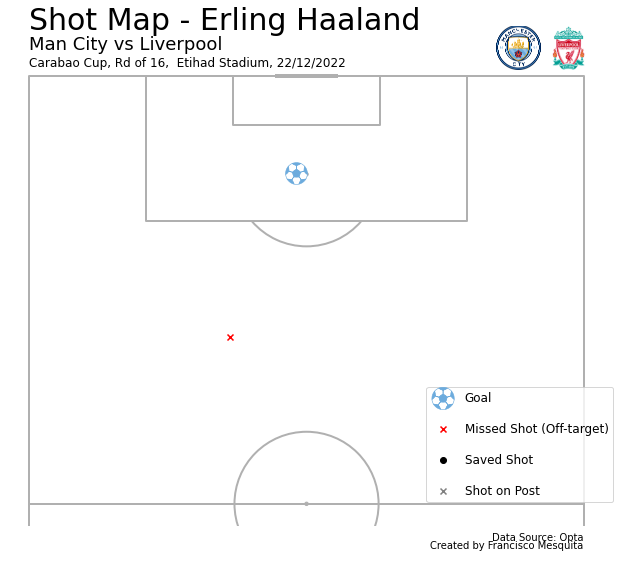

In [47]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")


pitch.scatter(player3_Goal.x, player3_Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

pitch.scatter(player3_MissedShots.x, player3_MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Missed Shot (Off-target)')

pitch.scatter(player3_SavedShot.x, player3_SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')

pitch.scatter(player3_ShotOnPost.x, player3_ShotOnPost.y, c = 'grey', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')


axs['title'].text(0, 0.7, 'Shot Map - Erling Haaland', va = 'center', ha = 'left', fontsize = 30)
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

# add a legend and title
legend = axs['pitch'].legend(loc = (0.7,.05), labelspacing = 1.5, fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')


#axs['title'].text(0.5, -6.7, "Man City: Shots: 18 | Shots on Target: 9 | xG: 1.8 | Goal: 3", 
#                 color = cHome, va = 'center', ha = 'center', fontsize = 18)

plt.show()